In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
!pip install openpyxl -q

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------  245.8/250.0 kB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00


In [11]:
file_path = "C:\\Users\\Giova\\Downloads\\Cartel1.xlsx" # reinserisci il tuo path

In [19]:
df = pd.read_excel(file_path, skiprows=4, usecols=[3, 5]) # il tuo codice non mi andava, comunque l'importante è che abbia un dataframe di due colonne coi rispettivi valori
df.columns = ["year study", "production capacity"]

In [22]:
year = list(df["year study"])
size = list(df["production capacity"])

In [23]:
df.head()

,year study,production capacity
0,2005,0.0017
1,2010,0.0089
2,2011,2.6889
3,2012,2.9899
4,2014,4.0189


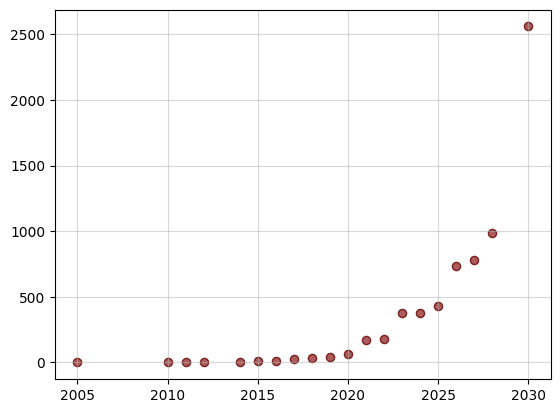

In [24]:
# set up chart area and grid
axes=plt.axes
plt.grid(alpha=0.5)

# plot data points
plt.scatter(year,size,s=35,alpha=0.8,color="#993333", edgecolors="#660000")

In [39]:
# logistic growth model
def func(x, L, x0, k):
    eval=L/(1+np.exp(-k*(x-x0)))
    return eval

p0 = (2550, 2010, 0.1) # ad occhio, vista la definizione, dei possibili valori iniziali sembrano questi

# fit data to logistic growth model
# L: maximum value of fit
# x0: inflection point
# k: growth rate
popt, pcov = curve_fit(func, year, size, p0=p0, maxfev=20000)  # dava errore su maxfev, l'ho aumentato

# bastava questa scrittura, più compatta
L, x0, k = popt

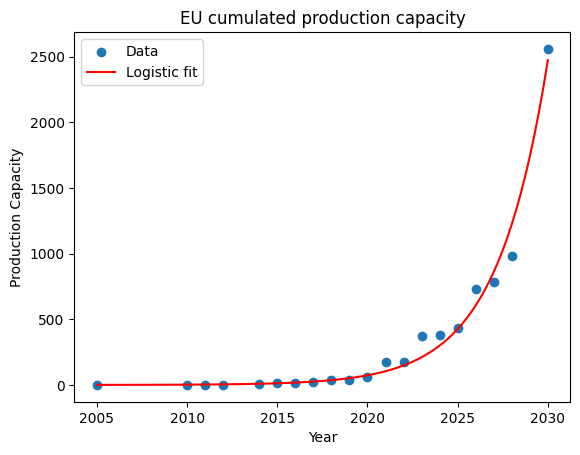

L: 623359535.5041063, x0: 2065.360968377511, k: 0.35172227782502774


In [43]:
x_seq = np.linspace(min(year),max(year),100)
y_fit = func(x_seq, L, x0, k)

# Plot the data and the fitted curve
plt.scatter(year, size, label='Data')
plt.plot(x_seq, y_fit, color='red', label='Logistic fit')
plt.xlabel('Year')
plt.ylabel('Production Capacity')
plt.title("EU cumulated production capacity")
plt.legend()
plt.show()


print(f"L: {L}, x0: {x0}, k: {k}")